# Capstone Project 1: EDA

This notebook contains the code for conducting EDA on the data set for my first capstone project.  The data used here was pulled from Kaggle's API and was wrangled using code contained in a separate notbook.  The code for data wrangling can be found in this folder's parent directory under \Data Wrangling\Capstone Project 1 Data Wrangling.ipynb.  The data used here have been cleaned and are read from a csv file that is stored in this directory.  

In the following EDA, I ask several questions to gain a better understanding of the data and to place it within the context of the business problem contained in the project description.  These questions are stated in bold above the corresponding analyses.

In [314]:
#Import packages

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn
import numpy as np
from scipy import stats as sts
import statsmodels.api as sm
import math

In [315]:
#Begin by reading in data

df = pd.read_csv('C:/Users/robva/Dropbox (Personal)/Springboard Data Science Course/Capstone Project 1/EDA/file_for_analysis.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,...,low_temperature,precipitation,hours_sunlight,avg_temperature_missing,high_temperature_missing,low_temperature_missing,precipitation_missing,hours_sunlight_missing,extreme_value,visitors_recode
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,...,22.0,0.0,4.4,False,False,False,True,False,74.297411,35.0
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,...,23.4,0.0,6.9,False,False,False,False,False,74.297411,9.0
2,air_00a91d42b08b08d9,2016-07-03,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,...,24.6,0.0,7.6,False,False,False,True,False,74.297411,0.0
3,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,...,23.6,1.5,7.1,False,False,False,False,False,74.297411,20.0
4,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,...,20.2,0.0,0.0,False,False,False,False,False,74.297411,25.0


# How many observations are there?

In [316]:
n = df.air_store_id.count()
print("There are", n, "unique observations.")

There are 296279 unique observations.


# What dates do the dataset cover?

In [317]:
df = df.sort_values(by = 'visit_date', ascending = True)
beginning = df.visit_date.min()
first_day = df.iloc[0,7]
last_day = df.iloc[-1,7]
end = df.visit_date.max()
print("The data include observations for every day between", first_day,",",beginning, "and",last_day,",", end,".")

The data include observations for every day between Friday , 2016-01-01 and Saturday , 2017-04-22 .


# How many restaurants are included in the dataset?

In [318]:
n_restaurant = len(df.groupby('air_store_id'))
print("There are",n_restaurant,"restaurants in the dataset.")

There are 829 restaurants in the dataset.


# How many stores are in each geographic region?


In [319]:
stores_by_region = df.drop_duplicates(['air_area_name','air_store_id'], keep='first')
stores_by_region = stores_by_region.groupby(by='air_area_name').count()
stores_by_region = stores_by_region['air_store_id'].to_frame().sort_values(by = 'air_store_id', ascending=False)
pd.set_option('display.max_rows', 103)
stores_by_region.head(10)

,air_store_id
air_area_name,
Fukuoka-ken Fukuoka-shi Daimyō,64
Tōkyō-to Shibuya-ku Shibuya,58
Tōkyō-to Minato-ku Shibakōen,51
Tōkyō-to Shinjuku-ku Kabukichō,39
Tōkyō-to Setagaya-ku Setagaya,30
Tōkyō-to Chūō-ku Tsukiji,29
Ōsaka-fu Ōsaka-shi Ōgimachi,25
Hiroshima-ken Hiroshima-shi Kokutaijimachi,23
Tōkyō-to Meguro-ku Kamimeguro,22


# How many restaurants are in each 'genre'?

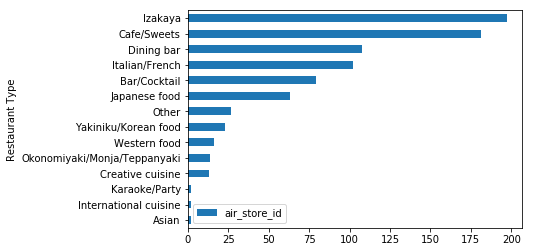

<Figure size 432x288 with 0 Axes>

In [320]:
stores_by_type = df.drop_duplicates(['air_genre_name','air_store_id'], keep='first')
stores_by_type = stores_by_type.groupby(by='air_genre_name').count()
stores_by_type = stores_by_type['air_store_id'].to_frame().sort_values(by = 'air_store_id', ascending=True)
stores_by_type = stores_by_type.rename({'air_store_id':'Count'})
stores_by_type.plot(kind='barh')
plt.ylabel('Restaurant Type')
plt.show()
plt.gcf().clear()

# What is the distribution of reservations?

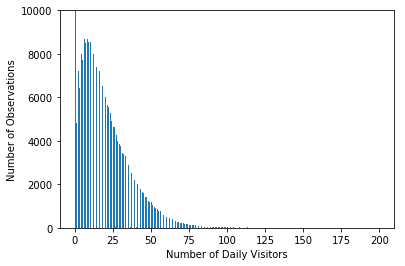

In [321]:
plt.hist(df.visitors_recode, bins = 400)
plt.ylim(df.visitors_recode.min(),10000)
plt.xlabel('Number of Daily Visitors')
plt.ylabel('Number of Observations')
plt.show()

In [322]:
df.visitors_recode.median(), df.visitors_recode.describe()

(14.0, count    296279.000000
 mean         17.778167
 std          16.607249
 min           0.000000
 25%           5.000000
 50%          14.000000
 75%          26.000000
 max         199.855943
 Name: visitors_recode, dtype: float64)

# How many observations have zero visitors?

In [323]:
abnormal_freq = df.groupby('visitors_recode').count()
abnormal_freq = abnormal_freq.sort_values(by = 'air_store_id', ascending = False)
zeros = abnormal_freq.iloc[0,0]
print('There are many observations with 0 visitors (', zeros,').')

There are many observations with 0 visitors ( 44171 ).


# How do average reservations change over time?

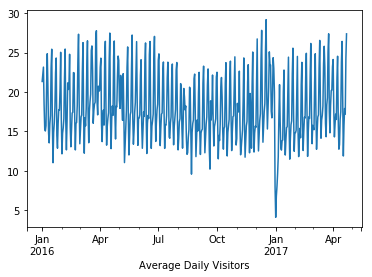

There does not appear to be an overall trend. However, there are clearly seasonal trends within each month.
There also appears to be some slight within-year trends. I will need to investigate the anomaly in January 2017 further.


In [324]:
df_dtix = df.set_index(pd.DatetimeIndex(df['visit_date']))
daily = df_dtix.resample('D').mean()
daily.visitors_recode.plot()
plt.xlabel('Average Daily Visitors')
plt.show()
print('There does not appear to be an overall trend. However, there are clearly seasonal trends within each month.')  
print('There also appears to be some slight within-year trends. I will need to investigate the anomaly in January 2017 further.')


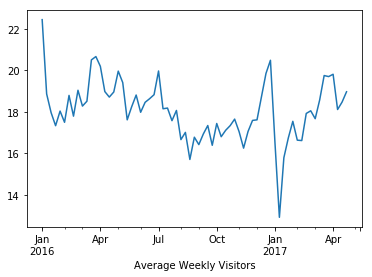

Looking at this trend by week provides a clearer picture of the seasonal variation.
It looks as if the number of visitors is highest April through July, December, and January.
The months betwen August through November seem to slow down for restaurants.


In [325]:
df_dtix = df.set_index(pd.DatetimeIndex(df['visit_date']))
weekly = df_dtix.resample('W').mean()
weekly.visitors_recode.plot()
plt.xlabel('Average Weekly Visitors')
plt.show()
print('Looking at this trend by week provides a clearer picture of the seasonal variation.')
print('It looks as if the number of visitors is highest April through July, December, and January.')
print('The months betwen August through November seem to slow down for restaurants.')

# Does the number of visitors change by day of the week?

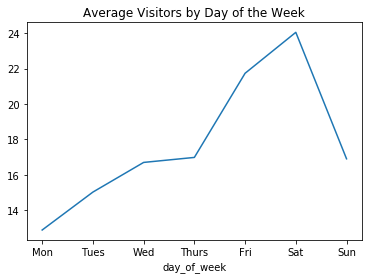

Monday is the slowest day of the week. The average number of visitors increases steadily throughout the week
and drops sharply on Sunday.


In [326]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
by_weekday = df.groupby(df.day_of_week).mean().reindex(ordered_days)
by_weekday.visitors_recode.plot()
plt.xticks(np.arange(7),('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
plt.title('Average Visitors by Day of the Week')
plt.show()
print('Monday is the slowest day of the week. The average number of visitors increases steadily throughout the week')
print('and drops sharply on Sunday.')

# Are the observed differences in average visitors by day of the week statistically significant?

In [327]:
df['ln_visitors'] = df['visitors_recode'] + 1
df['ln_visitors'] = np.log(df['ln_visitors'])
df = df.sort_values(['air_store_id','visit_date'])
df = pd.concat([df, pd.get_dummies(df['day_of_week'])], axis=1)
df = sm.add_constant(df, prepend = False)
x = df[['Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',
       'const']]
y = df['ln_visitors']
mod = sm.OLS(y,x)
fit = mod.fit()
fit = fit.get_robustcov_results(cov_type='hac-panel', groups = df['air_store_id'], time = df['visit_date'], maxlags=0)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_visitors   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     3019.
Date:                Tue, 25 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:54:10   Log-Likelihood:            -4.7647e+05
No. Observations:              296279   AIC:                         9.530e+05
Df Residuals:                  296272   BIC:                         9.530e+05
Df Model:                           6                                         
Covariance Type:            hac-panel                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tuesday        0.3036      0.009     35.065      0.000       0.287       0.321
Wednesday      0.4251      0.009     49.380      0.000       0.408       0.442
Thursday       0.4877      0.008     58.091      0.000       0.471       0.504
Friday         0.8020      0.008     99.310      0.000       0.786       0.818
Saturday       0.8381      0.008     99.547      0.000       0.822       0.855
Sunday         0.0969      0.010      9.928      0.000       0.078       0.116
const          1.9604      0.006    303.431      0.000       1.948       1.973
==============================================================================
Omnibus:                    22583.414   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24909.650
Skew:                          -0.677   Prob(JB):                         0.00
Kurtosis:                       2.569   Cond. No.                         7.89
==============================================================================

Warnings:
[1] Standard Errors are robust tocluster correlation (hac-panel)
"""

# Are the number of daily visitors and daily temperature related?

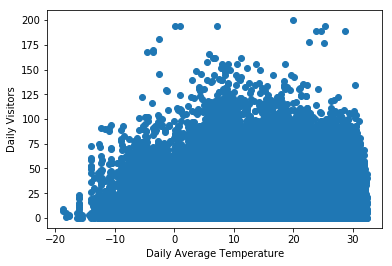

In [328]:
plt.scatter(df.avg_temperature, df.visitors_recode)
plt.xlabel('Daily Average Temperature')
plt.ylabel('Daily Visitors')
plt.show()

In [341]:
df = df.sort_values(['air_store_id','visit_date'])
xa = df[['avg_temperature','const']]
ya = df['ln_visitors']
moda = sm.OLS(ya,xa)
fita = moda.fit()
fita = fita.get_robustcov_results(cov_type='hac-panel', groups = df['air_store_id'], time = df['visit_date'], maxlags=0)
print(fita.summary())
print('The p-value of the coefficient is not statistically significant.')

                            OLS Regression Results                            
Dep. Variable:            ln_visitors   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.940
Date:                Tue, 25 Dec 2018   Prob (F-statistic):              0.164
Time:                        20:43:36   Log-Likelihood:            -4.8521e+05
No. Observations:              296279   AIC:                         9.704e+05
Df Residuals:                  296277   BIC:                         9.704e+05
Df Model:                           1                                         
Covariance Type:            hac-panel                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
avg_temperature     0.0004      0.000     

# Are the number of daily visitors and daily precipitation related?

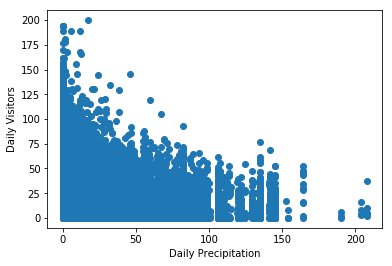

In [333]:
plt.scatter(df.precipitation,df.visitors_recode)
plt.xlabel('Daily Precipitation')
plt.ylabel('Daily Visitors')
plt.show()

In [338]:
df = df.sort_values(['air_store_id','visit_date'])
xb = df[['precipitation','const']]
yb = df['ln_visitors']
modb = sm.OLS(yb,xb)
fitb = modb.fit()
fitb = fitb.get_robustcov_results(cov_type='hac-panel', groups = df['air_store_id'], time = df['visit_date'], maxlags=0)
print(fitb.summary())
print('Although the p-value of the coefficient is statistically significant, the extremely small R-squared and coefficient estimates suggest that the model is of little practical value.')

                            OLS Regression Results                            
Dep. Variable:            ln_visitors   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     303.3
Date:                Tue, 25 Dec 2018   Prob (F-statistic):           4.09e-58
Time:                        01:59:10   Log-Likelihood:            -4.8506e+05
No. Observations:              296279   AIC:                         9.701e+05
Df Residuals:                  296277   BIC:                         9.702e+05
Df Model:                           1                                         
Covariance Type:            hac-panel                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
precipitation    -0.0030      0.000    -17.415

# Are the number of daily visitors and average daily hours of sunlight related?

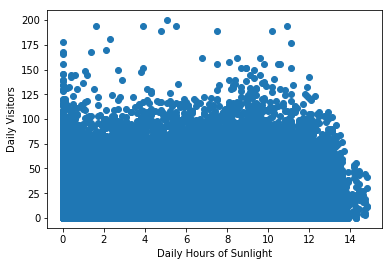

There does not appear to be a relationship between number of visitors and hours of sunlight.


In [339]:
plt.scatter(df.hours_sunlight,df.visitors_recode)
plt.xlabel('Daily Hours of Sunlight')
plt.ylabel('Daily Visitors')
plt.show()
print('There does not appear to be a relationship between number of visitors and hours of sunlight.')

In [340]:
df = df.sort_values(['air_store_id','visit_date'])
xc = df[['hours_sunlight','const']]
yc = df['ln_visitors']
modc = sm.OLS(yc,xc)
fitc = modc.fit()
fitc = fitc.get_robustcov_results(cov_type='hac-panel', groups = df['air_store_id'], time = df['visit_date'], maxlags=0)
print(fitc.summary())
print('Although the p-value of the coefficient is statistically significant, the extremely small R-squared and coefficient estimates suggest that the model is of little practical value.')

                            OLS Regression Results                            
Dep. Variable:            ln_visitors   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     152.8
Date:                Tue, 25 Dec 2018   Prob (F-statistic):           2.48e-32
Time:                        01:59:18   Log-Likelihood:            -4.8514e+05
No. Observations:              296279   AIC:                         9.703e+05
Df Residuals:                  296277   BIC:                         9.703e+05
Df Model:                           1                                         
Covariance Type:            hac-panel                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
hours_sunlight     0.0072      0.001     12.